# Regression Analysis
- 복잡한 현상을 사람이 이해할 수 있을 정도의 간단한 구조로 충분히 설명할 수 있는 모형을 찾는 것이 목표임

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


## 12.1. Simple regression model
- explanatory variable (independent) 1
- response variable (dependent)      1

In [4]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1 # The number of explanatory variable

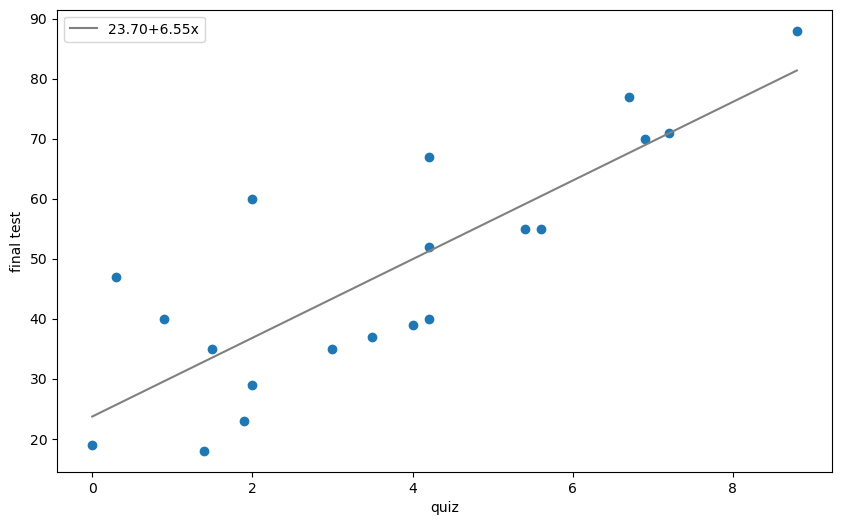

In [ ]:
poly_fit = np.polyfit(x, y, 1)    # quiz & intercept
poly_1d = np.poly1d(poly_fit)     # function
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

### 12.1.1 Hypothesis in regression analysis
- error term
#####
- 설명변수는 확률변수가 아니다 
    - fix explanatory variable, 오차만 확률적으로 취급한다
    - 확률적 변동성은 오직 오차항에서만 발생한다고 전제하는 것
- ei는 서로 독립이고, N(0, 시그마 제곱)
    - Independence : 한 관측치의 오차가 다른 관측치의 오차에 영향을 주지 않아야한다.
    - 평균 0 : 오차항이 체계적인 편향을 가지지 않음
    - 분산 일정 (등분산성) : 모든 관측치에서 오차 분산이 같아야 t-검정 / F-검정이 유효
    - Normaility : 큰 표본에서는 중심 극한 정리 때문에 덜 중요하지만, 작은 표본에서는 회귀계수의 추론(t, F 분포 사용)을 위해 필요함
####
- Estimate regression coefficient 

### 12.1.2. statsmodels

In [6]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           8.59e-06
Time:                        13:58:24   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Point esimate
    - smaller residual sum of squares 
    - How? : ordinary least squares

In [9]:
np.ones_like(x)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [10]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/var/folders/1l/6dhcmnn51hj3w9sg068lv3_r0000gn/T/ipykernel_47926/1547428137.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.699, 6.554)

In [ ]:
# Prediction
y_hat = beta0_hat + beta1_hat * x
# Residual (residual)
eps_hat = y - y_hat

In [12]:
s_var = np.var(eps_hat, ddof = p+1)
s_var

134.290

- Interval estimate
    - Standard error를 구해야함 
    - diagonal elements 

In [13]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [14]:
# Standard error
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

In [15]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796, 33.603)

In [16]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.309, 8.799)

- T- test

In [18]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133

In [ ]:
# p value
(1 - rv.cdf(t)) * 2

0.000

In [17]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.028

In [20]:
(1 - rv.cdf(t)) * 2

0.000

## 12.2 Multiple regression model

In [21]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           6.19e-06
Time:                        14:42:35   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.2.1 Regression Coefficient

In [22]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

In [23]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

/var/folders/1l/6dhcmnn51hj3w9sg068lv3_r0000gn/T/ipykernel_47926/2925482474.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.871, 6.429, 4.192)

In [26]:
# Prediction
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2

# Residual
eps_hat = y - y_hat

In [27]:
# Standard error
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [ ]:
# Confidence interval(beta2)
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.440, 7.943)

### 12.2.2. dummy variable
- a numerical variable assigned to categorical data, taking values of 0 or 1 to represent the presence or absence of a characteristic


In [30]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit() 
result.summary()

# two school_method added

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           7.47e-05
Time:                        14:52:22   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12.3. Model selection